<a href="https://colab.research.google.com/github/Julianbedoya2000/Proyectos-de-practica/blob/main/Aprendiendo_modelodepredicci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import itertools

In [2]:
## Esta es la primera parte del proceso, la recolección de los datos, que vienen en formato csv desde una base de datos online

# Uncomment if running locally, else download data using the following code cell
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


In [3]:
# Los datos los guardamos en un dataframe de Pandas, los datos que se guardan son entendidos como texto

recipes.head()# podemos ver la estructura y los datos para entender como estan almacenados.

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [4]:
recipes.shape # para entender mejor las dimenciones de los datos, hay ( 57691 filas y 384 columnas)

(57691, 384)

In [5]:
ingredients = list(recipes.columns)  # se corrigio antes estaba:ingredients = list(recipes.columns.value)

# vamos a crear una variable que se llamara ingredientes
# que va a contener una lista con todas las columnas de nuestro data frame llamado - recipes -
# me quedaba la duda de la necesidad del .values pues esto hace que transformesmos las columnas en un formato de array usado en numpy para calculos matematicos para volverlo a convertir en una lista


print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(ron).*")).search(ingredient)] if match])


# no entiendo para que usar esta formula pero con un for recorremos todas las columnas buscando palabras que coincidan, debe ayudar a ver rapidamente datos

['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']
['macaroni', 'saffron']


In [6]:
column_names = recipes.columns.values # aqui traemos todos los valores de las columnas transformados con .value a formato numpy para hacer operaciones mas faciles
column_names[0] = "cuisine" # cambiamos el valor ubicado en la posición 0
recipes.columns = column_names  # ahora decimos que las columnas de nuestra base de datos van a tomar los valores de la lista que hicimos y así tambien toma el cambio de la columna 0

In [7]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [8]:
print(recipes["cuisine"].unique()) # es imprimir sin duplicados los datos de una columna

['Vietnamese' 'Indian' 'Spanish_Portuguese' 'Jewish' 'French'
 'Central_SouthAmerican' 'Cajun_Creole' 'Thai' 'Scandinavian' 'Greek'
 'American' 'African' 'MiddleEastern' 'EasternEuropean_Russian' 'Italian'
 'Irish' 'Mexican' 'Chinese' 'German' 'Mediterranean' 'Japanese'
 'Moroccan' 'Southern_SoulFood' 'English_Scottish' 'Asian' 'Southwestern'
 'chinese' 'mexico' 'japanese' 'east_asian' 'asian' 'western' 'korean'
 'italian' 'Canada' 'Turkey' 'Caribbean' 'Bangladesh' 'India' 'France'
 'Italy' 'Israel' 'Korea' 'Iran' 'Eastern-Europe' 'South-African'
 'UK-and-Ireland' 'China' 'Belgium' 'Germany' 'South-America' 'Spain'
 'Netherlands' 'Scandinavia' 'Philippines' 'Indonesia' 'East-African'
 'Vietnam' 'Thailand' 'Switzerland' 'West-African' 'North-African'
 'Pakistan' 'Portugal' 'Mexico' 'Lebanon' 'Malaysia' 'Austria' 'Japan']


In [9]:
recipes["cuisine"] = recipes["cuisine"].str.lower() # para poner todos los datos tipo .str en minusculas

In [10]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian" # la formula recipes.loc [ selecciona todos los datos donde se cumple una condicion , en la columna coisine]
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian" #  nuestra condicion sera dada por la formula recipes [hae un buleano asigna tru o false si en la columna cousine esta el dato == dato]
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"  # al final los datos de la columna que cumplan la condición sera remplazado por el = al final de la formula
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

In [11]:
print(recipes["cuisine"].unique())

['vietnamese' 'indian' 'spanish_portuguese' 'jewish' 'french'
 'central_southamerican' 'cajun_creole' 'thai' 'scandinavian' 'greek'
 'american' 'african' 'middleeastern' 'easterneuropean_russian' 'italian'
 'uk-and-irish' 'mexican' 'chinese' 'german' 'mediterranean' 'japanese'
 'moroccan' 'southern_soulfood' 'english_scottish' 'asian' 'southwestern'
 'east_asian' 'western' 'korean' 'canadian' 'turkish' 'caribbean'
 'bangladesh' 'israeli' 'iranian' 'eastern-europe' 'south-african'
 'belgian' 'south-america' 'dutch' 'philippine' 'indonesian'
 'east-african' 'swiss' 'west-african' 'north-african' 'pakistani'
 'lebanese' 'malaysian' 'austrian']


In [12]:
# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts() # en la variable vamos a almacenar de nuestra base de datos -recipes ["solo los datos de la columna cuisine"]. el numero de veces que se repite cada valor unico
cuisines_indices = recipes_counts > 50 # esta nueva varible devuelve falso o verdaro si los valores unicos se repiten mas de 50 veces

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)]) # esta variable va a contener los valores unicos que se repitan mas de 50 veces, haciendo un cruce entre las dos variables recipes-count y cousines-indices
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)] # con repices.loc indicamos que va a traer las filas de nuestra base de datos de nuestra base de datos "cusine", pero solo va a traer los datos verdadesros .isin de la variable cousine-to-keep

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

/tmp/ipython-input-3910772473.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0)


In [13]:
print(recipes_counts)

cuisine
american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       320
japanese                     320
german                       289
thai                         289
mediterranean                289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
cajun_creole                 146
easterneuropean_russian      146
moroccan                     137
african                      115
so

In [14]:
print(cuisines_indices)

cuisine
american                    True
italian                     True
mexican                     True
french                      True
asian                       True
east_asian                  True
korean                      True
canadian                    True
indian                      True
western                     True
chinese                     True
spanish_portuguese          True
uk-and-irish                True
southern_soulfood           True
jewish                      True
japanese                    True
german                      True
thai                        True
mediterranean               True
scandinavian                True
middleeastern               True
central_southamerican       True
eastern-europe              True
greek                       True
english_scottish            True
caribbean                   True
cajun_creole                True
easterneuropean_russian     True
moroccan                    True
african                     True
so

In [15]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]  # estoy creando una variable que solo contiene 5 cocinas
cuisines = asian_indian_recipes["cuisine"] # en esta variblle, de las 5 cocinas conservo solo la columna "coisine"
ingredients = asian_indian_recipes.iloc[:,1:] # en esta varible conservo las demas columnas a exepción de la primera

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3) # aqui se crea la variable que almacena nuestro arbol
bamboo_tree.fit(ingredients, cuisines) # indicamos variable x como ingredients - variable y como cocinas  - vamos a predecir y - teniendo en cuenta si tien o no x

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


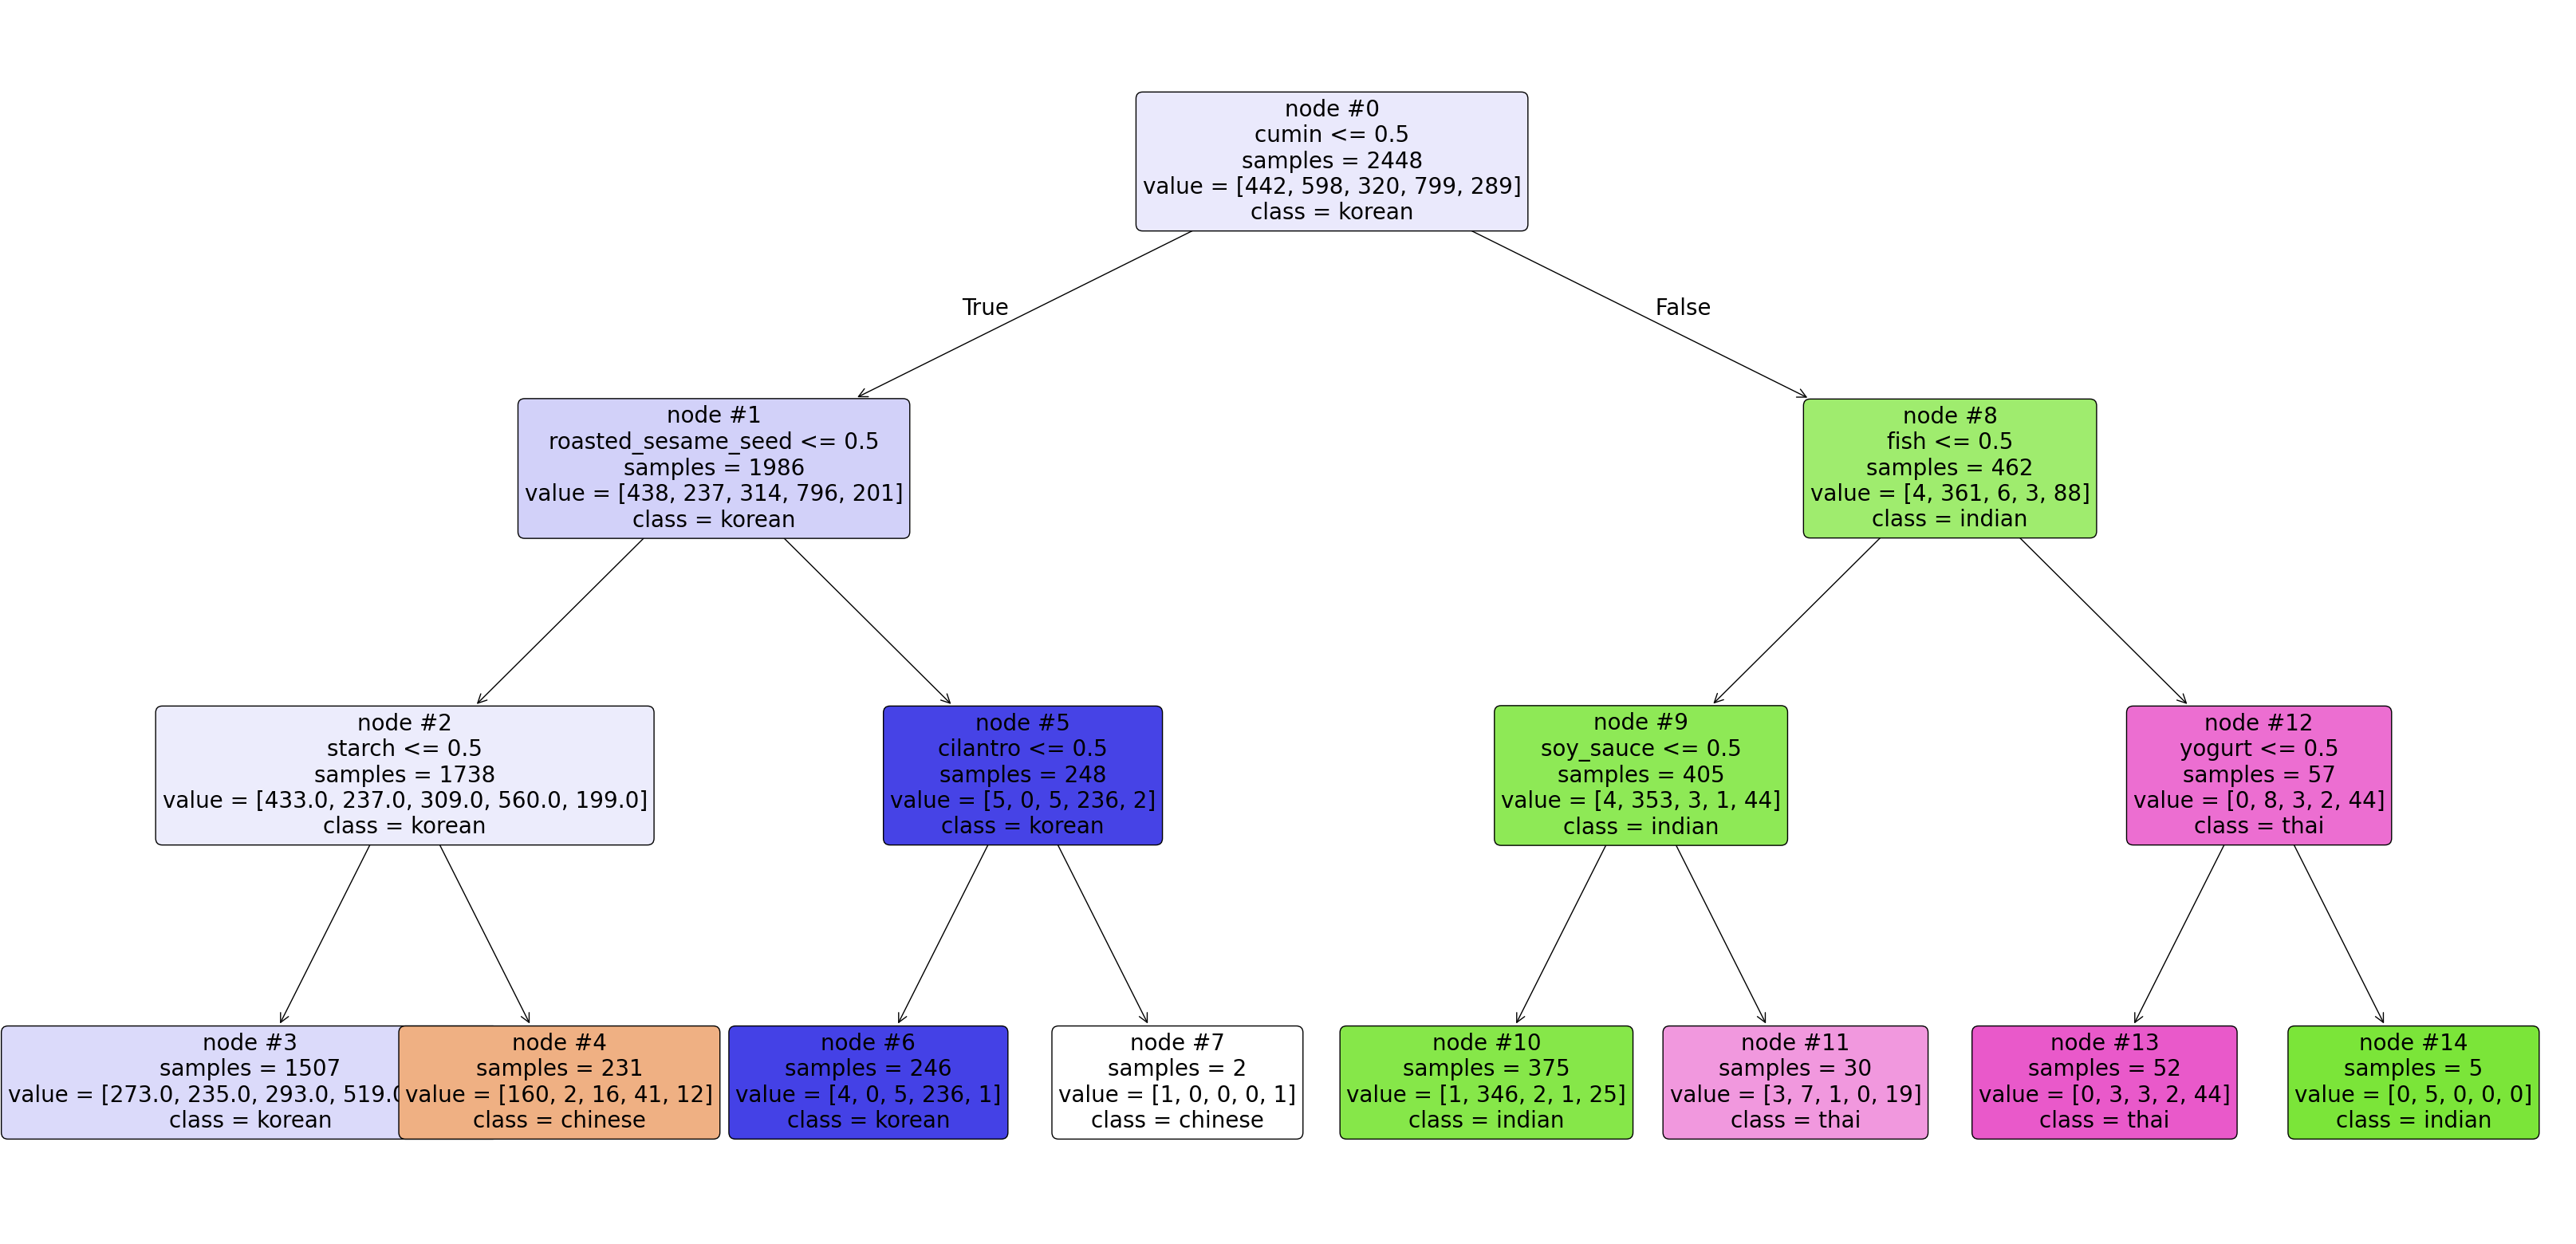

In [16]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

In [17]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
bamboo["cuisine"].value_counts()

,count
cuisine,
korean,799
indian,598
chinese,442
japanese,320
thai,289


In [18]:
# set sample size
sample_n = 30

# take 30 recipes from each cuisine
import random # import random module
random.seed(1234) # set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

/tmp/ipython-input-2950079842.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))


In [19]:
# Paso 1: bamboo.groupby("cuisine", group_keys=False)
#Esto agrupa el DataFrame bamboo por la columna "cuisine", es decir, agrupa todas las filas que tienen el mismo tipo de cocina (ej. italian, mexican, chinese, etc).

# Ejemplo: si hay 1000 recetas y 10 tipos de cocina, este paso agrupa esas 1000 recetas en 10 grupos, uno por cada tipo de cocina.

#group_keys=False evita que el índice del grupo se añada al resultado final. Es solo para que la salida sea más limpia.


#Paso 2: .apply(lambda x: x.sample(sample_n))
#Aquí es donde hacemos algo con cada grupo (tipo de cocina).

#apply() significa “aplica una función a cada grupo”.

#lambda x: x.sample(sample_n) es una función anónima:

#x representa un grupo (por ejemplo, todas las recetas italianas).

#.sample(sample_n) selecciona aleatoriamente sample_n filas (recetas) de ese grupo.

In [20]:
# check that we have 30 recipes from each cuisine
bamboo_test["cuisine"].value_counts()

,count
cuisine,
chinese,30
indian,30
japanese,30
korean,30
thai,30


In [21]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels


In [22]:
bamboo_train["cuisine"].value_counts()

,count
cuisine,
korean,769
indian,568
chinese,412
japanese,290
thai,259


In [23]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


In [24]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

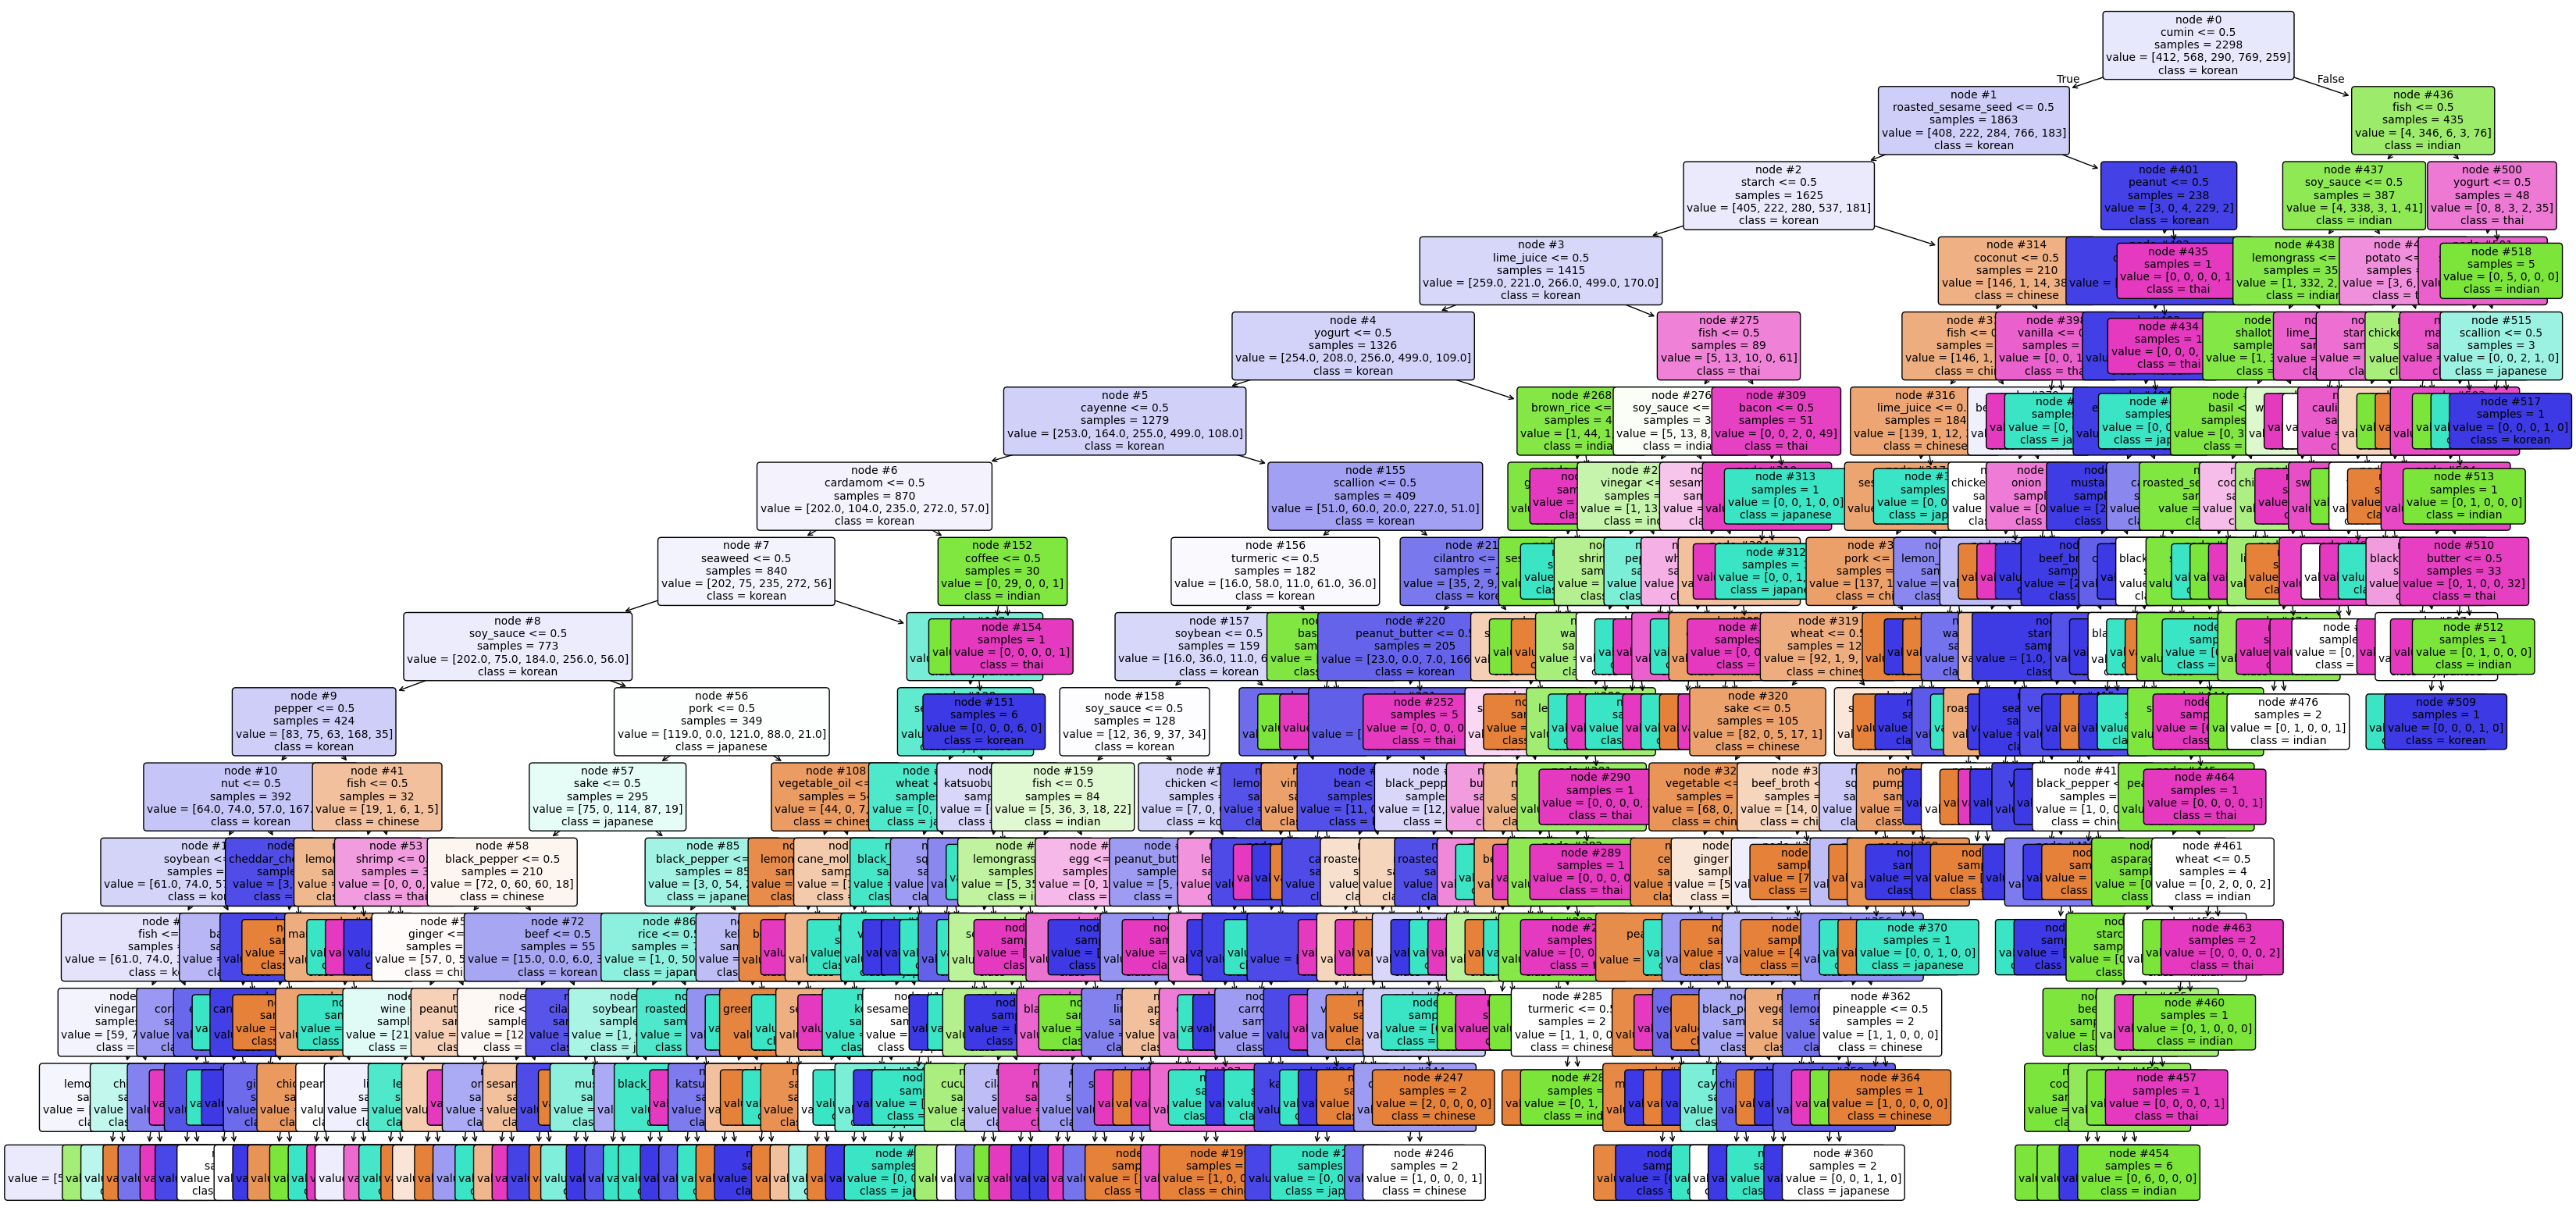

In [25]:
# export_graphviz(bamboo_train_tree,
#                 feature_names=list(bamboo_train_ingredients.columns.values),
#                 out_file="bamboo_train_tree.dot",
#                 class_names=np.unique(bamboo_train_cuisines),
#                 filled=True,
#                 node_ids=True,
#                 special_characters=True,
#                 impurity=False,
#                 label="all",
#                 leaves_parallel=False)

# with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
#     bamboo_train_tree_graph = bamboo_train_tree_image.read()
# graphviz.Source(bamboo_train_tree_graph)

plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_train_tree,
                   feature_names=list(bamboo_train_ingredients.columns.values),
                   class_names=np.unique(bamboo_train_cuisines),
                   filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()

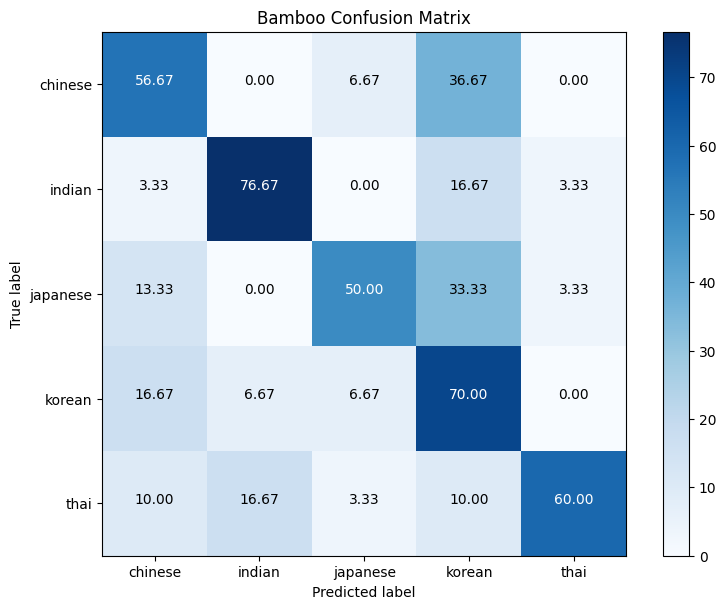

In [26]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()